<a href="https://colab.research.google.com/github/lucasmoschen/Math_Topics/blob/master/Optimal_Control/mfb_hiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de Controle ótimo para o tratamento de HIV
## Modelagem em Fenômenos Biológicos
## Lucas Machado Moschen

In [0]:
#importando módulos

import numpy as np
import matplotlib.pyplot as plt

### Modelo sem variáveis de controle. 

Classe para as Equações Diferenciais

In [0]:
class equation: 
  def __init__(self,alpha,s,r,r2,C,m1,kt,km,m2,m3,N,M,gv,b,kv,Th0,V0,Tk0,Q):
    self.s = s
    self.a = alpha
    self.r = r
    self.C = C
    self.m1 = m1
    self.kt = kt
    self.m2 = m2
    self.N = N
    self.M = M
    self.gv = gv
    self.b = b
    self.kv = kv
    self.Th0 = Th0
    self.V0 = V0
    self.r2 = r2
    self.m3 = m3
    self.km = km
    self.Tk0 = Tk0
    self.Q = Q

  def dTh(self,t,th,ti,tk,v): 
    return self.a*self.s/(1 + v)  - self.m1*th - self.kt*th*v + self.r*th*(1 - (th + ti)/1500) + self.r2*th*v/(self.C + v)
  
  def dTi(self,t,th,ti,tk,v): 
    return self.kt*th*v - self.m2*ti - self.r2*ti*v/(self.C + v) - self.km*tk*ti

  def dV(self,t,th,ti,tk,v):
    c = self.N*self.m2*ti + self.M*self.r2*ti*v/(self.C + v) + self.gv*v/(self.b + v) - self.kv*th*v + self.Q*ti
    return c

  def dTk(self,t,th,ti,tk,v):
    return (1 - self.a)*self.s/(1 + v) + self.r*tk*v/(self.C + v) - self.m3*tk

  def solve(self,dias):
    Th = np.zeros(dias*1000)
    Ti = np.zeros(dias*1000)
    Tk = np.zeros(dias*1000)
    V = np.zeros(dias*1000)
    V[0] = self.V0
    Th[0] = self.Th0
    Tk[0] = self.Tk0
    for t in range(dias*1000 - 1):
      Th[t+1] = Th[t] + self.dTh(t,Th[t],Ti[t],Tk[t],V[t])*0.001
      Ti[t+1] = Ti[t] + self.dTi(t,Th[t],Ti[t],Tk[t],V[t])*0.001
      Tk[t+1] = Tk[t] + self.dTk(t,Th[t],Ti[t],Tk[t],V[t])*0.001
      V[t+1] = V[t] + self.dV(t,Th[t],Ti[t],Tk[t],V[t])*0.001
    return Th, Ti, Tk, V

Parâmetros

In [0]:
alpha = 2/3
s = 5
r = 0.03
r2 = 0.01
C = 100
m1 = 0.02
kt = 0.000024
m2 = 0.5
m3 = 0.02
N = 20
gv = 2
b = 10
kv = 0.00079
Th0 = 1000
V0 = 0.001
M = 1000
km = 0.0027
Tk0 = 500
Q = 1.5

Plot do primeiro resultado, variando gV

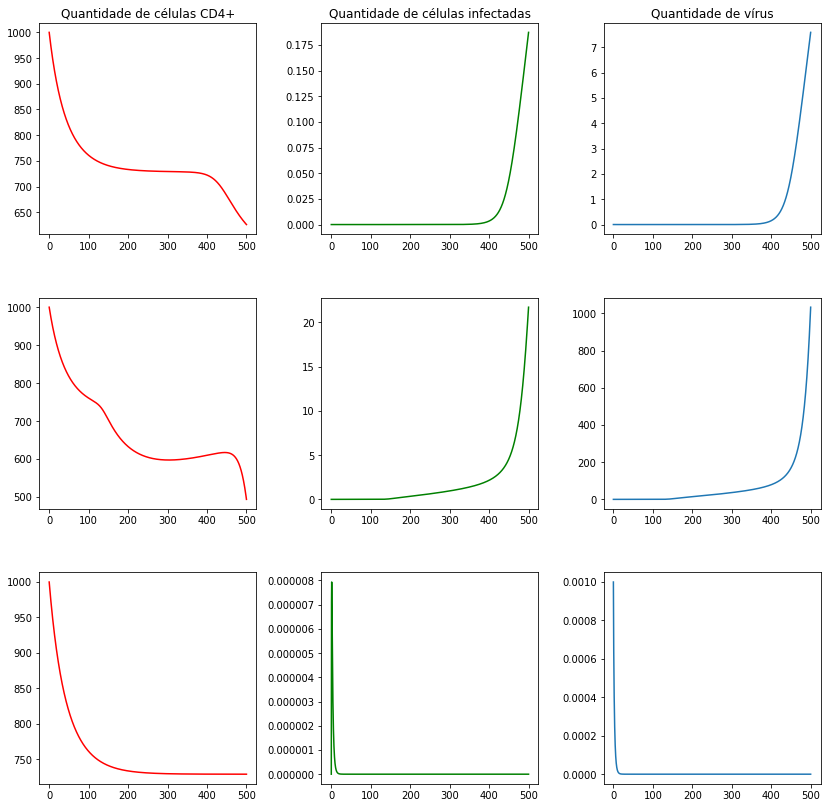

In [31]:
e1 = equation(alpha,s,r,r2,C,m1,kt,km,m2,m3,N,M,3.7,b,kv,Th0,V0,Tk0,Q)
Th1,Ti1,Tk1,V1 = e1.solve(500)
e2 = equation(alpha,s,r,r2,C,m1,kt,km,m2,m3,N,M,5,b,kv,Th0,V0,Tk0,Q)
Th2,Ti2,Tk2,V2 = e2.solve(500)
e3 = equation(alpha,s,r,r2,C,m1,kt,km,m2,m3,N,M,2,b,kv,Th0,V0,Tk0,Q)
Th3,Ti3,Tk3,V3 = e3.solve(500)
x = np.linspace(0,500,500000)

fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(3,3,1)
plt.plot(x,Th1,'r')
plt.title('Quantidade de células CD4+')
plt.subplot(3,3,2)
plt.plot(x,Ti1,'g')
plt.title('Quantidade de células infectadas')
plt.subplot(3,3,3)
plt.plot(x, V1)
plt.title('Quantidade de vírus')
plt.subplot(3,3,4)
plt.plot(x,Th2,'r')
plt.subplot(3,3,5)
plt.plot(x,Ti2,'g')
plt.subplot(3,3,6)
plt.plot(x, V2)
plt.subplot(3,3,7)
plt.plot(x,Th3,'r')
plt.subplot(3,3,8)
plt.plot(x,Ti3,'g')
plt.subplot(3,3,9)
plt.plot(x, V3)
plt.show()